In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import tissue.api as tissue

import scanpy as sc
sc.settings.set_figure_params(dpi=80)


In [3]:
raw_path = ''
data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer"

In [4]:
data_origin = 'basel_zurich'
survival_name = 'DFSmonth'
grade_name = 'grade'
save = None
suffix = '.pdf'

In [5]:
save = "/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/basel_zurich/"

In [6]:
interpreter = tissue.fits.InterpreterGraph(results_path='', model_id='', cv='', model_class='')

In [115]:
transform="standardize_globally"
interpreter.get_data(
    data_origin=data_origin,
    data_path=raw_path,
    buffered_data_path=buffered_data_path,
    write_buffer=False,
    radius=20,
    target_label=grade_name,
    graph_label_selection=[grade_name, survival_name],
    graph_covar_selection=[],
    node_feature_transformation=transform,
    adj_type="full",
)

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 559 images with complete data from 350 patients over 1142488 cells with 34 cell features and 7 distinct celltypes.

Whole dataset: 559 images from 350 patients.
Test dataset: 50 images from 35 patients.
Training dataset: 459 images from 283 patients.
Validation dataset: 50 images from 32 patients.



## Number Nodes

In [8]:
keys = list(interpreter.data.img_celldata.keys())
nr_nodes = np.array([interpreter.a[key].shape[0] for key in keys])
cohort = np.array(['b' if 'Basel' in key else 'z' for key in keys])

In [121]:
save

'/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/basel_zurich/'

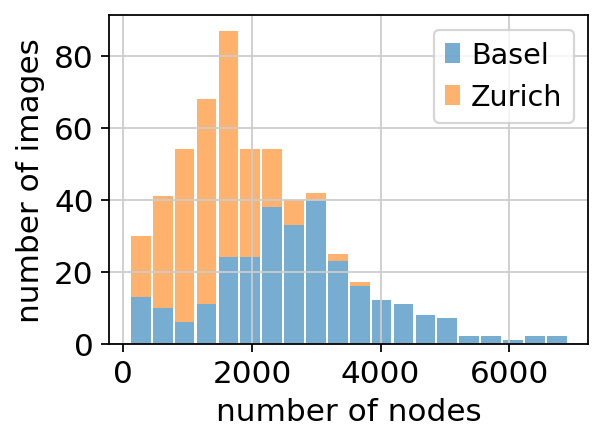

In [122]:
plt.figure(figsize=(4,3))
plt.hist([nodes_basel, nodes_zurich], label=['Basel', 'Zurich'], bins = 20, stacked=True, rwidth=0.9, alpha=0.6)
plt.xlabel('number of nodes')
plt.ylabel('number of images')
plt.legend()

if save is not None:
    plt.tight_layout()
    plt.savefig(save + '_hist_nr_nodes_dpi80' + suffix)
plt.show()

In [82]:
print('min:', np.min(nr_nodes), '     max:', np.max(nr_nodes))

min: 101      max: 6908


In [83]:
print("mean number of nodes:", np.mean(nr_nodes))

mean number of nodes: 2043.8067978533095


In [84]:
print("median number of nodes:", np.median(nr_nodes))

median number of nodes: 1792.0


#### Degree vs Distance

In [103]:
dists = np.square(np.arange(4, 50, 2)) // 4

1.0070948459205797
2.0355758255645444
5.614498853191933
12.175878820134454
23.424996584341137
41.05132160271513
66.81968676705904
102.44954463237893
149.56282633226746
209.53492086274372
283.33288399375107
371.4794196242392
474.0284170024256
590.3274512824041
718.9873692092416
857.854300700034
1003.9500197643356
1153.4778217786522
1301.7809550947027
1443.6971517086058
1573.4293379726264
1686.722908680546
1783.7034715967332


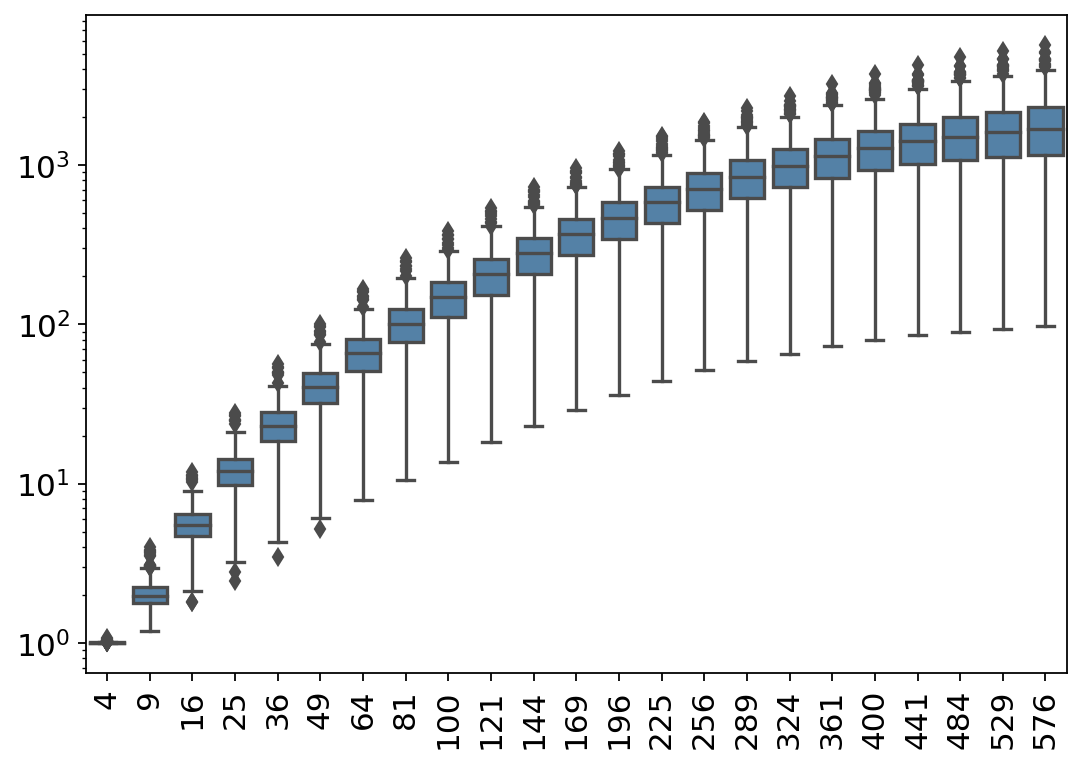

In [107]:
interpreter.data.plot_degree_vs_dist(
    max_distances=dists,
    save = save + '_all_dpi80',
    panel_width=7,
    panel_height=5,
)

2.50824773136398
8.214621024654416
42.59320819847288


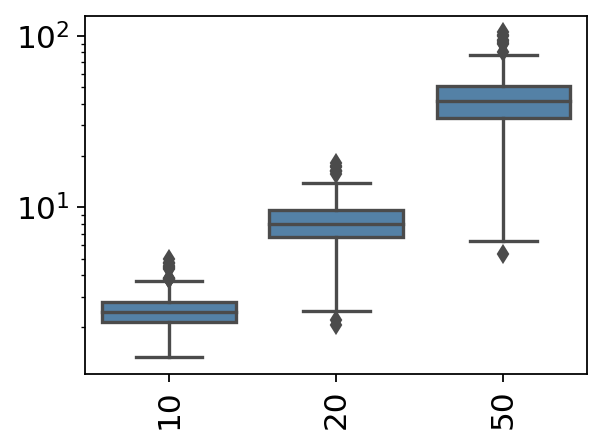

In [106]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[10, 20, 50],
    save = save + "_dpi80"
)

#### Node feature transformation

In [39]:
labels = np.concatenate([
                    [interpreter.data.img_celldata[image_key].uns['graph_covariates']['label_tensors']['tumor_type']]
                    for image_key in keys
                ])

In [40]:
labels

array([[nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [12]:
sns.set_palette("colorblind")

In [26]:
interpreter.data.img_celldata[keys[0]].uns["node_type_names"]

{'B cells': 'B cells',
 'T and B cells': 'T and B cells',
 'T cells': 'T cells',
 'endothelial': 'endothelial',
 'macrophages': 'macrophages',
 'stromal cells': 'stromal cells',
 'tumor cells': 'tumor cells'}

In [28]:
interpreter.data.img_celldata[keys[0]].uns['graph_covariates']['label_selection']

['grade',
 'tumor_size',
 'diseasestatus',
 'location',
 'tumor_type',
 'age',
 'Patientstatus',
 'DFSmonth',
 'OSmonth',
 'clinical_type',
 'Subtype',
 'PTNM_M',
 'PTNM_T',
 'PTNM_N',
 'PTNM_Radicality',
 'Lymphaticinvasion',
 'Venousinvasion',
 'ERStatus',
 'PRStatus',
 'HER2Status',
 'TripleNegDuctal',
 'microinvasion',
 'I_plus_neg',
 'SN',
 'Pre-surgeryTx',
 'Post-surgeryTx',
 'TMABlocklabel',
 'Yearofsamplecollection',
 'percentage_tumorcells',
 'percentage_normalepithelialcells',
 'percentage_stroma',
 'percentage_inflammatorycells',
 'Count_Cells']

In [53]:
interpreter.data.img_celldata[keyss[0]].uns['graph_covariates']['label_tensors']

{'tumor_size': array([0.53510977]),
 'age': array([0.41272272]),
 'Yearofsamplecollection': array([-0.78083739]),
 'Count_Cells': array([1.32477196]),
 'percentage_tumorcells': array([0.9]),
 'percentage_normalepithelialcells': array([0.]),
 'percentage_stroma': array([0.1]),
 'percentage_inflammatorycells': array([0.]),
 'grade': array([0, 0, 1], dtype=uint8),
 'diseasestatus': array([1], dtype=uint8),
 'location': array([nan, nan]),
 'tumor_type': array([nan, nan, nan, nan, nan, nan, nan]),
 'Patientstatus': array([1., 0., 0., 0.]),
 'clinical_type': array([0., 1., 0., 0.]),
 'Subtype': array([0., 0., 1., 0.]),
 'PTNM_M': array([1, 0, 0], dtype=uint8),
 'PTNM_T': array([0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'PTNM_N': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'PTNM_Radicality': array([1., 0.]),
 'Lymphaticinvasion': array([nan, nan]),
 'Venousinvasion': array([nan, nan]),
 'ERStatus': array([0., 1.]),
 'PRStatus': array([1., 0.]),
 'HER2Status': array([1., 0.]),
 

In [50]:
interpreter.data.img_celldata[keys[0]]

AnnData object with n_obs × n_vars = 3682 × 34
    obs: 'core', 'PID', 'cluster', 'cluster_preprocessed'
    uns: 'metadata', 'img_keys', 'img_to_patient_dict', 'node_type_names', 'graph_covariates', 'adjacency_matrix_neighbors'
    obsm: 'spatial', 'node_types'
    obsp: 'adjacency_matrix_connectivities', 'adjacency_matrix_distances'

In [11]:
keys = [
 'BaselTMA_SP41_257_X3Y1',
 'BaselTMA_SP41_7_X5Y1',
 'BaselTMA_SP41_166_X15Y4',
 'BaselTMA_SP41_238_X7Y1',
 'BaselTMA_SP41_68_X9Y1',
 'BaselTMA_SP41_72_X11Y1',
 'BaselTMA_SP41_274_X13Y1',
 'ZTMA208_slide_32_By8x4',
 'ZTMA208_slide_32_By8x5',
 'ZTMA208_slide_32_By8x6',
 'ZTMA208_slide_32_By8x7',
 'ZTMA208_slide_23_Cy5x3',
 'ZTMA208_slide_23_Cy5x4',
 'ZTMA208_slide_23_Cy5x5',]

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 559 images with complete data from 350 patients over 1142488 cells with 34 cell features and 7 distinct celltypes.

Whole dataset: 559 images from 350 patients.
Test dataset: 50 images from 35 patients.
Training dataset: 459 images from 283 patients.
Validation dataset: 50 images from 32 patients.



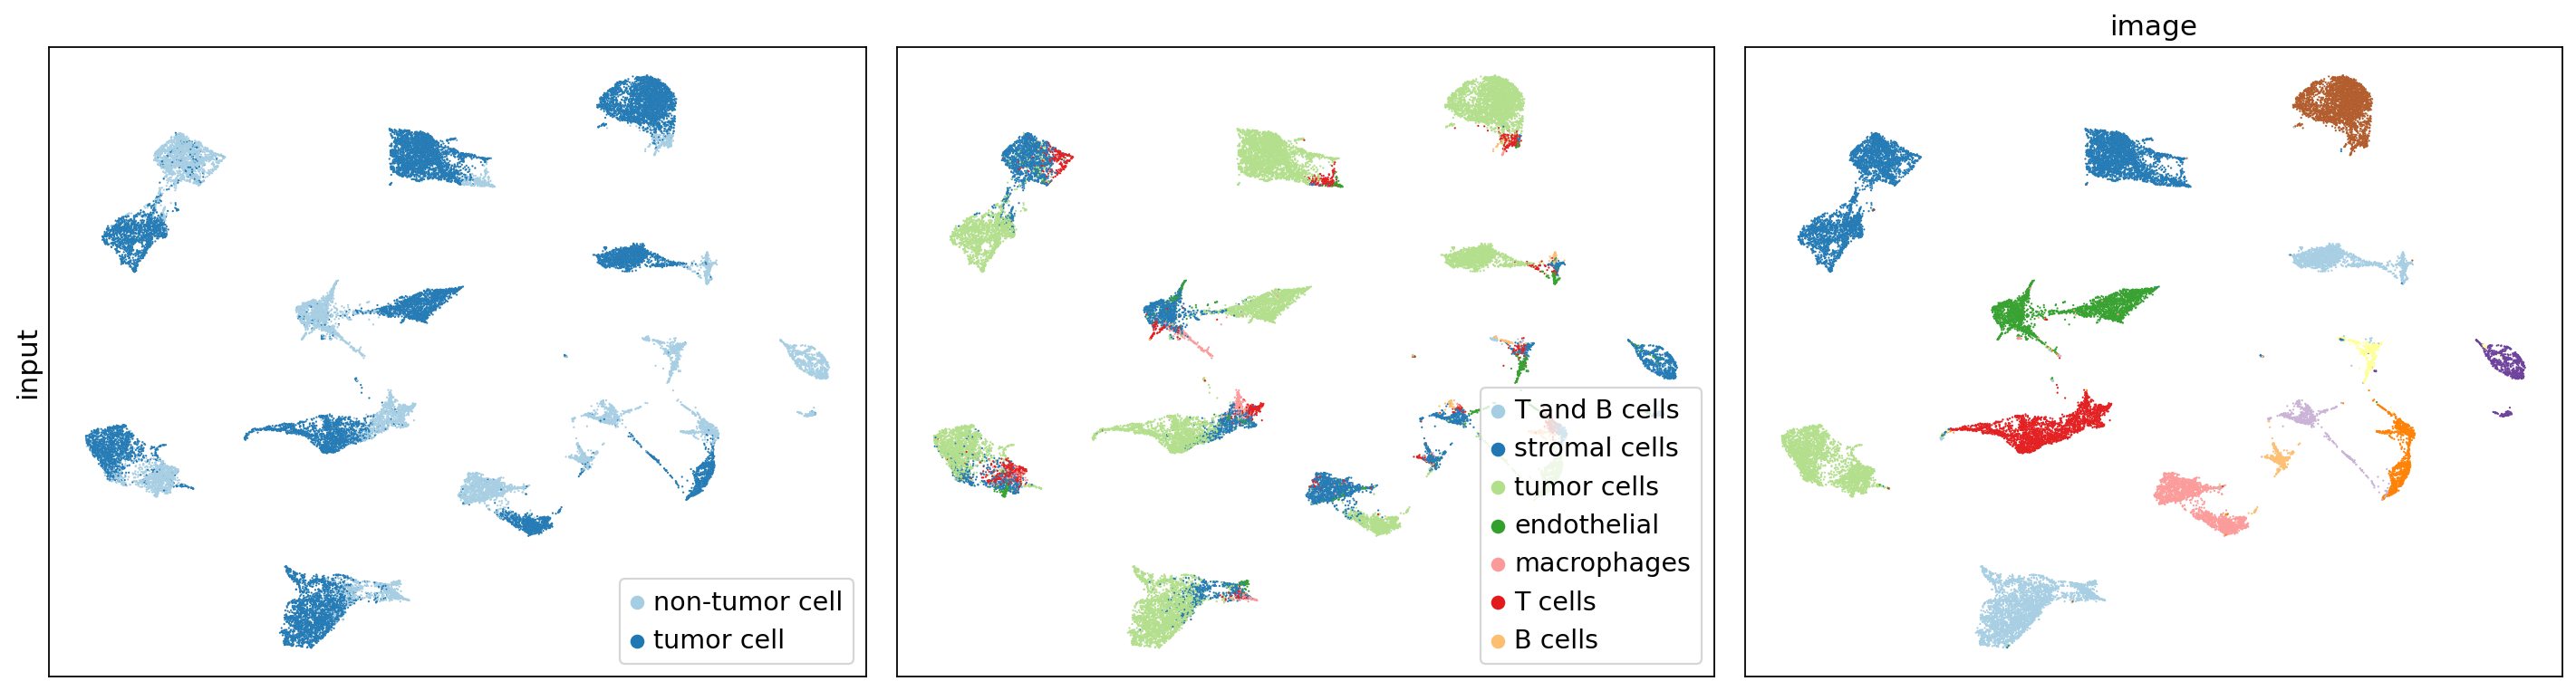

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 559 images with complete data from 350 patients over 1142488 cells with 34 cell features and 7 distinct celltypes.

Whole dataset: 559 images from 350 patients.
Test dataset: 50 images from 35 patients.
Training dataset: 459 images from 283 patients.
Validation dataset: 50 images from 32 patients.



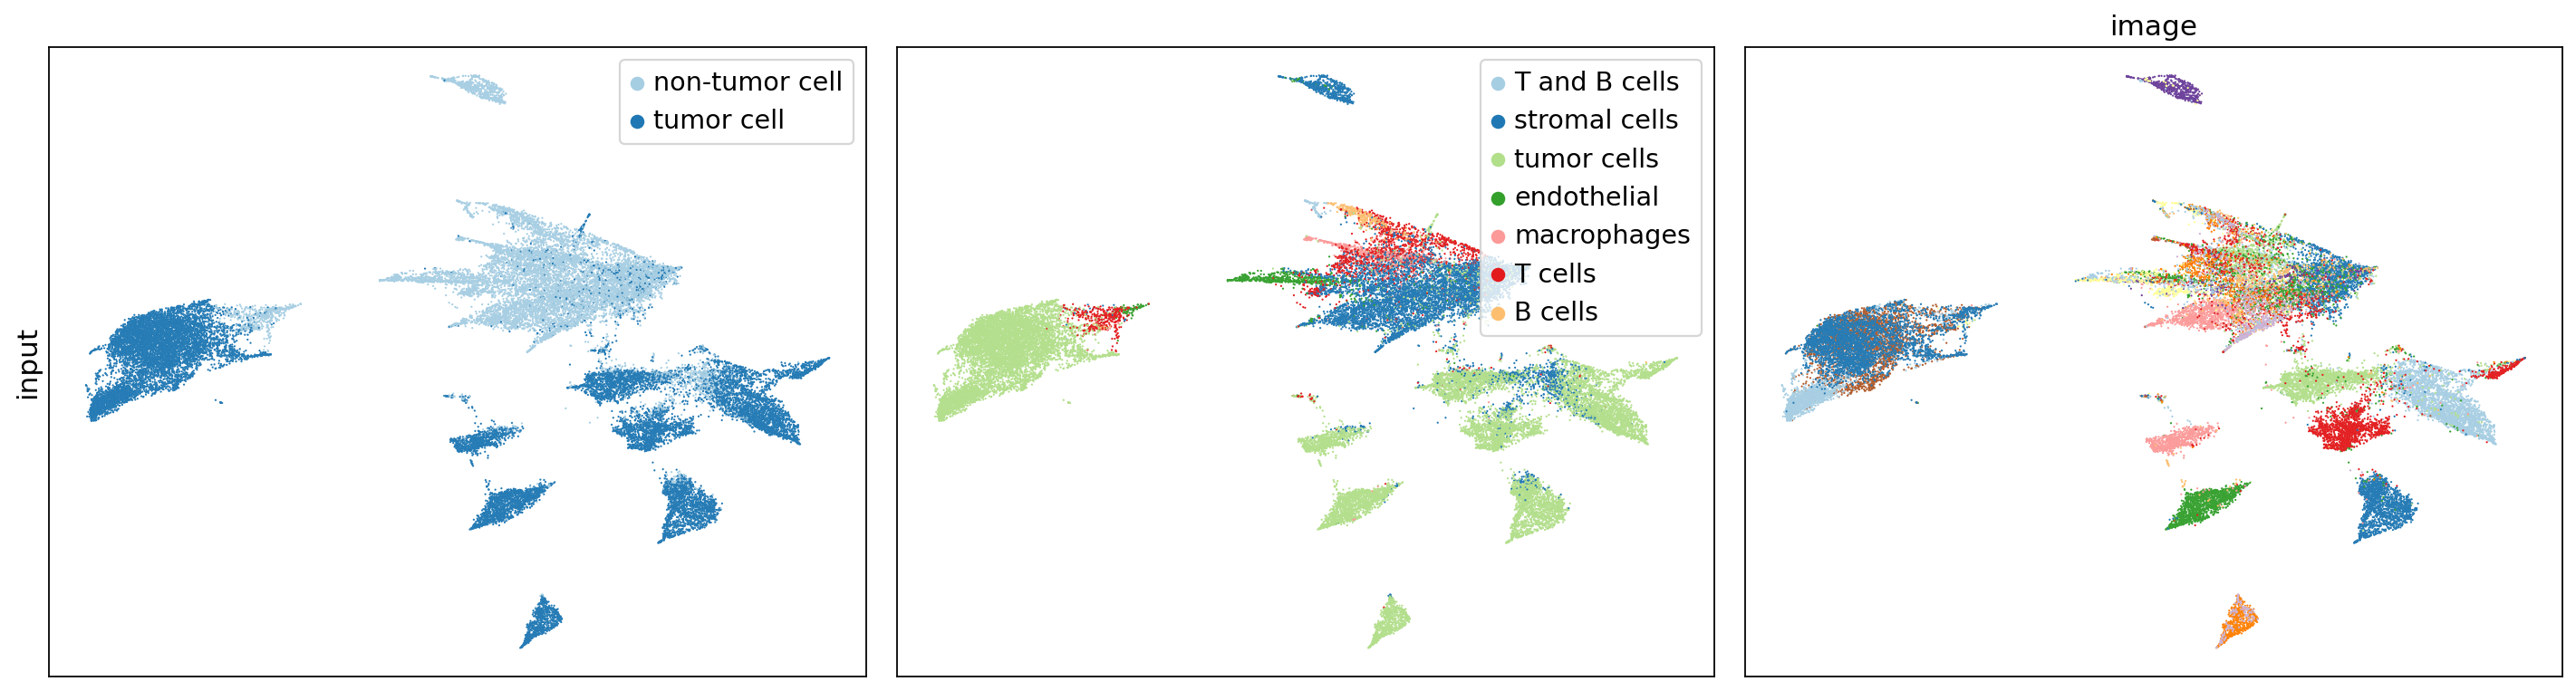

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 559 images with complete data from 350 patients over 1142488 cells with 34 cell features and 7 distinct celltypes.

Whole dataset: 559 images from 350 patients.
Test dataset: 50 images from 35 patients.
Training dataset: 459 images from 283 patients.
Validation dataset: 50 images from 32 patients.



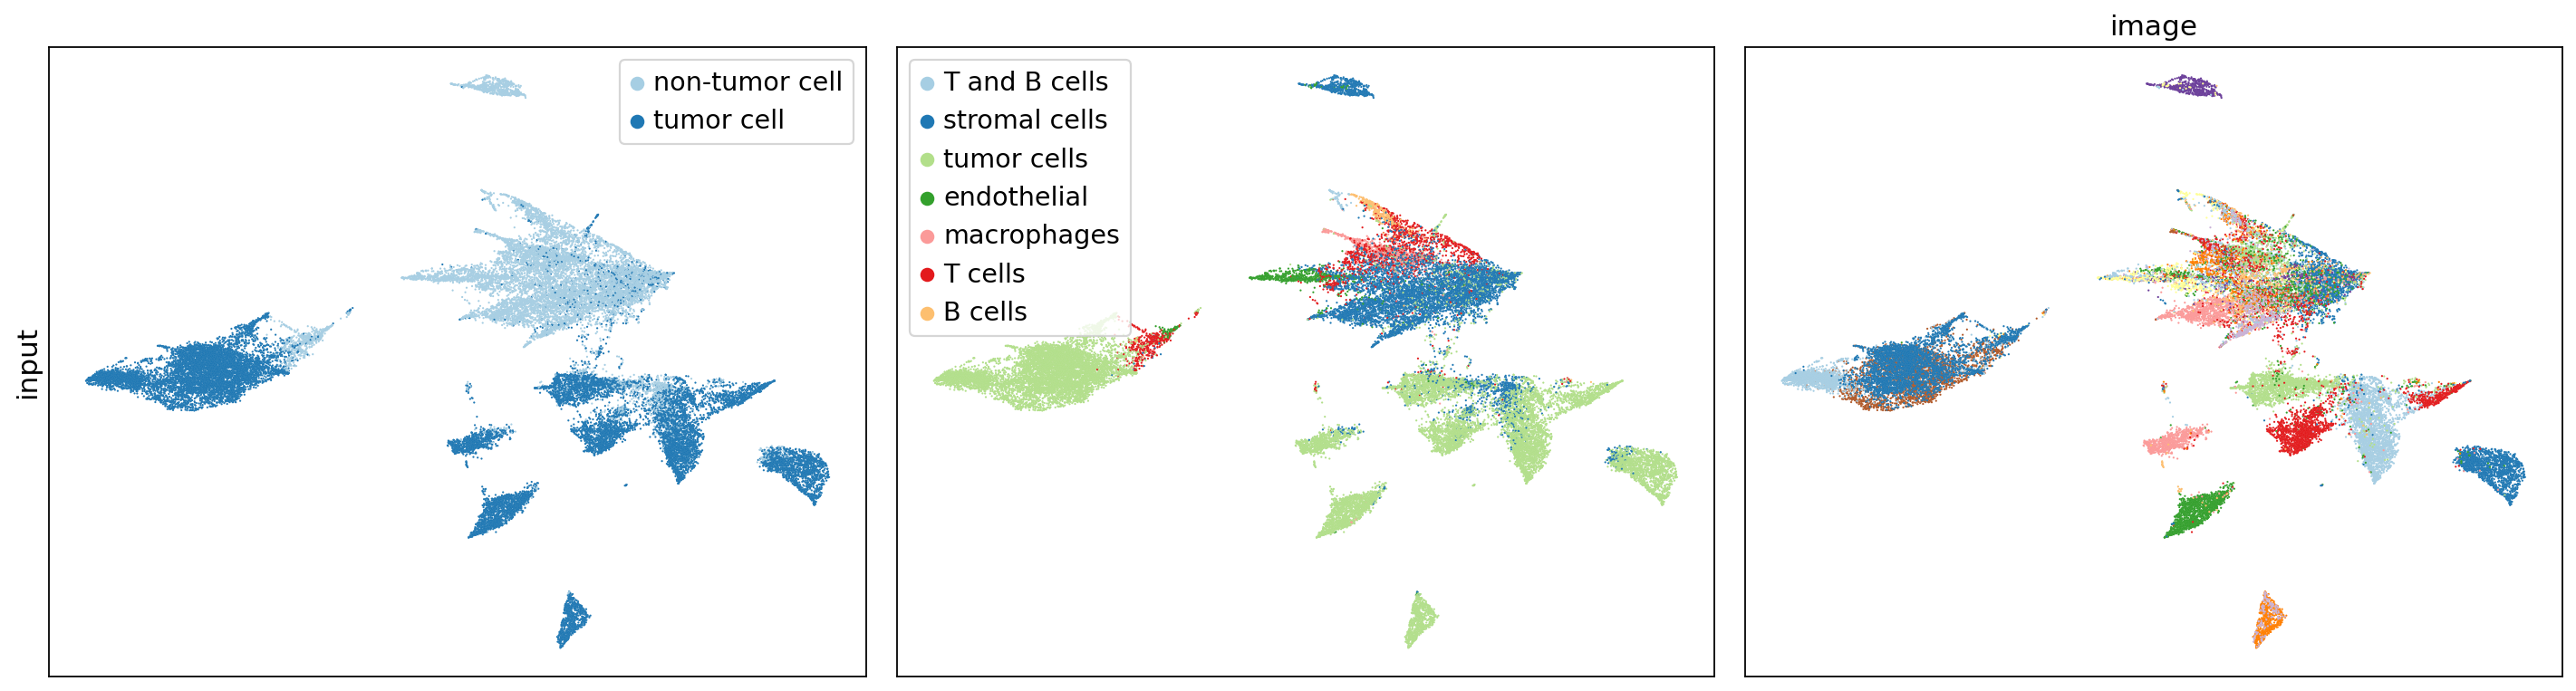

In [16]:
if save is not None:
    filename = save + '_subset_images_dpi80'
else:
    filename = None
    
for transform in ['standardize_per_image', 'standardize_globally', 'none']:
    interpreter.get_data(
        data_origin=data_origin,
        data_path=raw_path,
        buffered_data_path=buffered_data_path,
        write_buffer=False,
        radius=20,
        target_label=grade_name,
        graph_label_selection=[grade_name, survival_name],
        graph_covar_selection=[],
        node_feature_transformation=transform,
        adj_type="full",
    )
    interpreter.plot_umap_nodes(
        keys,
        save = filename + transform,
        plot_types = ['tumor', 'types', 'images'],
        layer_names=['input'],
        panel_height=5,
        panel_width=6,
    )